<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Projet: 🤖 Méthodologies de l’IA 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Utilisation des réseaux RBF.
       </h2>
</center>



<p style="font-size:1.5em">📜 Table des matières:</p><br>
<div style="font-size:1.3em">
    <ul>
       <li>
          <a href="#Intro-section">Introduction 📖</a>
          <ul><br>
             <li><a href="#overview">Aperçu</a></li><br>
             <li><a href="#dataset">Jeu de données</a></li><br>
          </ul>
       </li>
       <li>
          <a href="#Analysis-section">Analyses et Transformations 🔎</a>
          <ul><br>
             <li><a href="#eda">Exploration de données</a></li><br>
             <li><a href="#trans">Transformation de données</a></li><br>
          </ul>
       </li>
       <li>
          <a href="#pre-processing">Pré-traitement ⚙️</a>
          <ul><br>
             <li><a href="#split-data">Diviser les données</a></li><br>
             <li><a href="#scale">échelonner les données</a></li><br>
          </ul>
       </li>
       <li>
          <a href="#model-building">Construction des modèles 🛠️</a>
          <ul><br>
             <li><a href="#SVM">Support vector machines</a></li><br>
              <li><a href="#KR">Kernel ridge</a></li><br>
             <li><a href="#RBF">Réseaux RBF</a></li><br>
             <li><a href="#RBF-Keras">Réseaux RBF avec Keras</a></li><br>
          </ul>
       </li>
       <li><a href="#Conclusion">Conclusion 📌</a></li>
    </ul>
</div>

<center id="Intro-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Introduction 📖
        </h1>
</center>

<div id="overview">
        <h1 style="color:#1a1a1a">
         ⮞  Aperçu
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Dans le cadre de notre etude Ce projet qui vise a Utilisation des <b>réseaux RBF</b> on va analyser, transformer notre jeu donnees et modeliser après en utilisant plusieurs modèles.
</span>

<div id="dataset">
        <h1 style="color:#1a1a1a">
         ⮞  Jeu de données
        </h1>
</div>


<span style="color:grey; font-size:1.2em"> L'ensemble de données est à 10 min pendant environ 4,5 mois. Les conditions de température et d'humidité de la maison ont été surveillées avec un réseau de capteurs sans fil ZigBee. Chaque nœud sans fil a transmis les conditions de température et d'humidité environ 3,3 min. Ensuite, les données sans fil ont été moyennées sur des périodes de 10 minutes. Les données énergétiques ont été enregistrées toutes les 10 minutes avec des compteurs d'énergie m-bus. La météo de la station météorologique de l'aéroport la plus proche (aéroport de Chievres, Belgique) a été téléchargée à partir d'un ensemble de données publiques de Reliable Prognosis (rp5.ru) et fusionnée avec les ensembles de données expérimentaux à l'aide de la colonne date et heure. Deux variables aléatoires ont été incluses dans l'ensemble de données pour tester les modèles de régression et pour filtrer les attributs non prédictifs (paramètres).
</span>

<center id="Analysis-section">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Analyses et Transformations 🔎
        </h1>
</center>

<div id="eda">
        <h1 style="color:#1a1a1a">
         ⮞  Exploration de données
        </h1>
</div>

<h4 style="color:grey"> Importation de bibliothèques </h4>

In [1]:
import os
from fnmatch import fnmatch

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

<span style="color:grey; font-size:1.2em">Important nos jeu de données sous les fichier <b>energydata_complete.csv</b></span>

In [2]:
df = pd.read_csv('Data/energydata_complete.csv')

<h4 style="color:grey"> Explorant notre jeu de données </h4>

In [3]:
df.shape

(19735, 29)

<span style="color:grey; font-size:1.2em">Un aperçu des données en utilisant les fonctions <b>info()</b> et <b>describe()</b> du pandas pour examiner les données. </span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Informations sur chaque feature :

- date heure année-mois-jour heure:minute:seconde
- Appliances, consommation d'énergie en Wh (variable cible pour la prédiction)
- lights, consommation d'énergie des appareils d'éclairage dans la maison en Wh
- T1, Température dans le coin cuisine, en degrés Celsius
- RH_1, Humidité dans le coin cuisine, en %
- T2, Température dans le séjour, en Celsius
- RH_2, Humidité dans le séjour, en %
- T3, Température dans la zone buanderie
- RH_3, Humidité dans la buanderie, en %
- T4, Température dans le bureau, en degrés Celsius
- RH_4, Humidité dans le bureau, en %
- T5, Température dans la salle de bain, en degrés Celsius
- RH_5, Humidité dans la salle de bain, en %
- T6, Température à l'extérieur du bâtiment (côté nord), en degrés Celsius
- RH_6, Humidité à l'extérieur du bâtiment (côté nord), en %
- T7, Température dans la salle de repassage, en Celsius
- RH_7, Humidité dans la salle de repassage, en %
- T8, Température chambre ado 2, en Celsius
- RH_8, Humidité chambre ado 2, en %
- T9, Température dans la chambre des parents, en Celsius
- RH_9, Humidité dans la chambre des parents, en %
- To, Température extérieure (de la station météo de Chièvres), en degrés Celsius
- Pressure (de la station météo de Chièvres), en mm Hg
- RH_out, Humidité extérieure (de la station météo de Chièvres), en %
- Wind speed (depuis la station météo de Chièvres), en m/s
- Visibility (depuis la station météo de Chièvres), en km
- Tdewpoint (de la station météo de Chièvres), °C
- va1, Variable aléatoire 1, non dimensionnelle
- va2, Variable aléatoire 2, non dimensionnelle

In [6]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<span style="color:grey; font-size:1.2em">Les données n'ont pas de <b>valeurs manquantes</b>, nous n'effectuerons donc pas un <b>nettoyage des données.</b> </span>

<div id="trans">
        <h1 style="color:#1a1a1a">
         ⮞  Transformation de données
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Traçons une Heatmap de corrélation des Features.
</span>

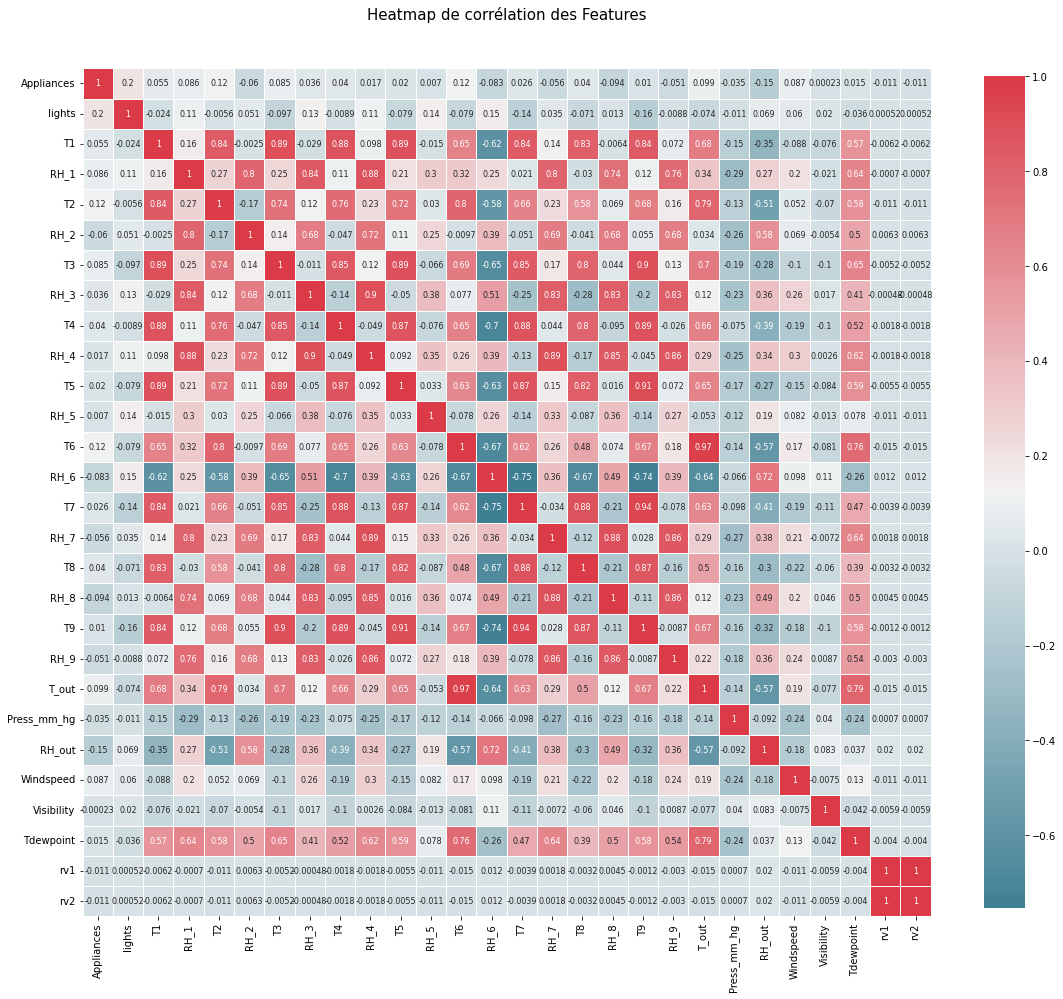

In [24]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(19, 17))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':8 }
    )
    
    plt.title('Heatmap de corrélation des Features', y=1.05, size=15)

correlation_heatmap(df)

<span style="color:grey; font-size:1.2em">Nous supprimerons les colonnes <b>'rv2', 'rv1', 'Visibilité'</b> car elles n'ont clairement aucun impact sur la valeur <b>'Appliances'</b>.
</span>

In [8]:
df.drop(['rv2', 'rv1', 'Visibility'], axis = 1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,41.626667,18.2000,48.900000,17.033333,45.5300,6.60,733.5,92.000000,7.000000,5.3
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,41.560000,18.2000,48.863333,17.066667,45.5600,6.48,733.6,92.000000,6.666667,5.2
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,41.433333,18.2000,48.730000,17.000000,45.5000,6.37,733.7,92.000000,6.333333,5.1
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,41.290000,18.1000,48.590000,17.000000,45.4000,6.25,733.8,92.000000,6.000000,5.0
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,41.230000,18.1000,48.590000,17.000000,45.4000,6.13,733.9,92.000000,5.666667,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,44.500000,24.7000,50.074000,23.200000,46.7900,22.70,755.2,55.666667,3.333333,13.3
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,44.414286,24.7000,49.790000,23.200000,46.7900,22.60,755.2,56.000000,3.500000,13.3
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,44.400000,24.7000,49.660000,23.200000,46.7900,22.50,755.2,56.333333,3.666667,13.3
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,44.295714,24.6625,49.518750,23.200000,46.8175,22.30,755.2,56.666667,3.833333,13.2


In [9]:
y = df['Appliances']
X = df.drop(['Appliances', 'date'], axis = 1)
X.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<center id="pre-processing">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Pré-traitement ⚙️
        </h1>
</center>

<div id="split-data">
        <h1 style="color:#1a1a1a">
         ⮞  Diviser les données
        </h1>
</div>



<span style="color:grey; font-size:1.2em">Nous commençons par diviser notre jeu de données <b>80%</b> pour l'entraînement et <b>20%</b> pour la validation.</span>


In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [11]:
print("la taille des données d'entraînement est: ",y_train.shape[0])
print("la taille d'échantillon du test est: ",y_valid.shape[0])

la taille des données d'entraînement est:  15788
la taille d'échantillon du test est:  3947


<div id="scale">
        <h1 style="color:#1a1a1a">
         ⮞  échelonner les données
        </h1>
</div>

<span style="color:grey; font-size:1.2em">`StandardScaler` standardise une Feature en soustrayant la moyenne, puis en la mettant à l'échelle de la variance unitaire. La variance unitaire consiste à diviser toutes les valeurs par l'écart type.
</span>

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid)

<span style="color:grey; font-size:1.2em">Principal Component Analysis, ou `PCA()`, est une méthode de réduction de la dimensionnalité qui est souvent utilisée pour réduire la dimensionnalité de grands ensembles de données, en transformant un grand ensemble de variables en un plus petit qui contient toujours la plupart des informations dans le grand ensemble.</span>

In [13]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)

In [14]:
print("le nombre des Principal component analysis est: ",pca.n_components_)

le nombre des Principal component analysis est:  26


<center id="model-building">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Construction des modèles 🛠️
        </h1>
</center>

<div id="SVM">
        <h1 style="color:#1a1a1a">
         ⮞  SVM
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Tout d'abord, nous allons essayer de prédire la valeur des 'Appliances' en utilisant une <b>SVM</b> (Support Vector Machine) avec un <b>kernel 'rbf'</b>.</span>

In [16]:
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)

SVR()

<span style="color:grey; font-size:1.2em">Créons une <b>évaluation</b> de fonction pour tester nos modèles et ploter <b>le score</b> sur les données d'entraînement et de validation.</span>

In [15]:
def evaluation(model):
    ypred = model.predict(X_valid)
    
    rmse = np.sqrt(mean_squared_error(y_valid, ypred))
    mae = mean_absolute_error(y_valid, ypred)
    
    print("la valeur du mean_squared_error est: ",rmse)
    print("la valeur mean_absolute_error est: ",mae)

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='neg_mean_squared_error',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
    return rmse, mae

<span style="color:grey; font-size:1.2em">Voici les résultats du <b>SVM</b> avec le noyau <b>RBF</b>.</span>

la valeur du mean_squared_error est:  98.4306917208136
la valeur mean_absolute_error est:  41.99280714976733


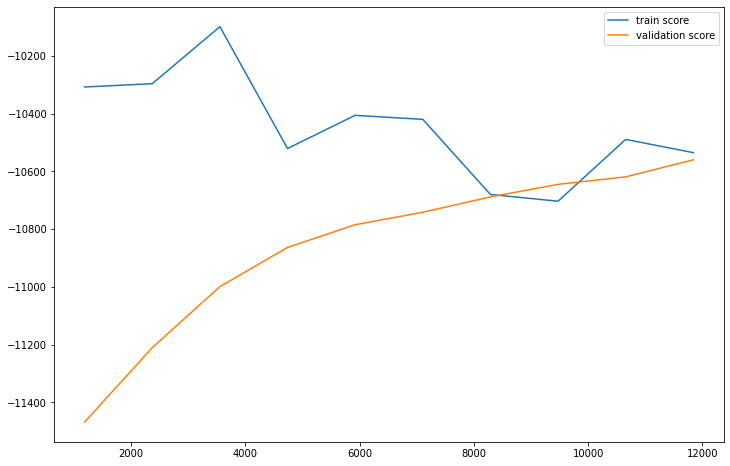

(98.4306917208136, 41.99280714976733)

In [34]:
evaluation(svm)

<div id="KR">
        <h1 style="color:#1a1a1a">
         ⮞  Kernel Ridge
        </h1>
</div>

In [18]:
kernel_ridge = KernelRidge(kernel ='rbf', alpha=1.0)

In [19]:
kernel_ridge.fit(X_train, y_train)

KernelRidge(alpha=1.0, kernel='rbf')

<span style="color:grey; font-size:1.2em">Voici les résultats du <b>kernel_ridge</b> avec <b>RBF</b> et une valeur d'<b>alphe = 1</b>.</span>

la valeur du mean_squared_error est:  82.56184495832957
la valeur mean_absolute_error est:  44.44104719071147


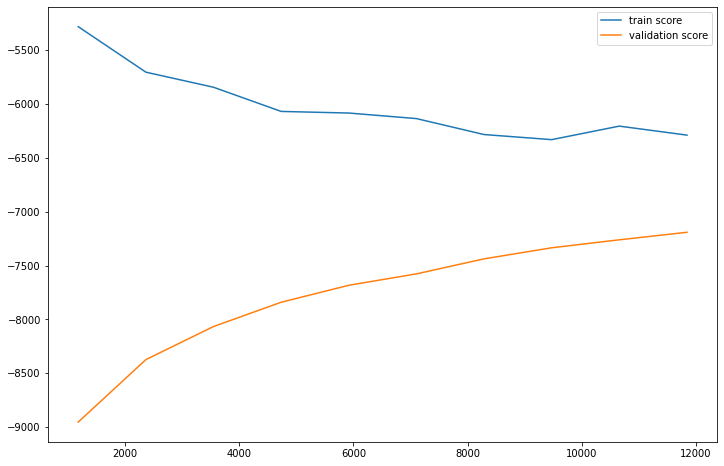

(82.56184495832957, 44.44104719071147)

In [35]:
evaluation(kernel_ridge)

<span style="color:grey; font-size:1.2em">Comme nous pouvons le voir, la <b>tolérance</b> fournie par kernel_ridge donne de meilleurs résultats que SVM. Ceci est dû à la différence de <b>loss functions</b> (<b>ridge</b> vs <b>epsilon-insensitive loss</b>).</span>

<div id="RBF">
        <h1 style="color:#1a1a1a">
         ⮞  Réseaux RBF
        </h1>
</div>

<span style="color:grey; font-size:1.2em">Nous allons maintenant créer notre <b>réseau RBF</b>.<br>
Essayons d'abord d'en créer un '<b>from scratch</b>' : pour ce faire, nous devons d'abord créer des <b>fonctions</b> qui nous aidera dans le processus.</span>

In [21]:
nbreClasses = 10
def rbf(x, c, s):
    distance = np.linalg.norm(np.array(x) - np.array(c))
    return 1 / np.exp(-distance/(2*s**2))
    
def kmeans(X, k, itersmax = 100): 
    
    clusters = X[np.random.choice(range(len(X)), k, replace=False)]
    converged = False
    
    iter = 0
    while (not converged) and (iter<itersmax):  
        
        cluster_list = [[] for i in range(len(clusters))]
        for x in X:
            distances = []
            for c in clusters:
                distances.append(np.linalg.norm(np.array(x) - np.array(c)))
            cluster_list[int(np.argmin(distances))].append(x)
            
        cluster_list = list((filter(None, cluster_list)))
        
        prevClusters = clusters.copy()
        clusters = []
        
        for j in range(len(cluster_list)):
            clusters.append(np.mean(cluster_list[j], axis = 0))
            
        diff = np.abs(np.sum(prevClusters) - np.sum(clusters))
        converged = (diff==0)
        
        iter += 1
        
    stds = [np.std(x) for x in cluster_list]
    return np.array(clusters), stds

<span style="color:grey; font-size:1.2em">Maintenant que nous avons créé notre <b>fonction rbf</b> et une autre fonction pour <b>le clustering kmeans</b>, nous créons ensuite <b>une class</b>e dans laquelle nous allons définir le processus <b>d'apprentissage et de prédiction</b>.<span>

In [22]:
class RBFNet(object):
    
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, k = 2, lr = 0.01, epochs = 100, rbf = rbf, inferStds = True):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.rbf = rbf
        self.inferStds = inferStds
        self.w = np.random.randn(10, k)
        self.b = np.random.randn(10, 1)
    
    def fit(self, X, y):
        if self.inferStds:
            # compute stds from data
            self.centers, self.stds = kmeans(X, self.k)
        else:
            # use a fixed std 
            self.centers, _ = kmeans(X, self.k)
            dMax = np.max([np.linalg.norm(np.array(c1) - np.array(c2)) for c1 in self.centers for c2 in self.centers])
            self.stds = np.repeat(dMax / np.sqrt(2*self.k), self.k)
        # training
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # forward pass
                a = np.array([self.rbf(X[i], c, s) for c, s, in zip(self.centers, self.stds)])

                F = a.T.dot(self.w) + self.b
                loss = (y[i] - F).flatten() ** 2

                # backward pass
                error = -(y[i] - F).flatten()
                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error
                
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            a = np.array([rbf(X[i], c, s) for c, s in zip(self.centers, self.stds)])
            F = self.w.dot(a.T) + self.b
            y_pred.append(F)
        return np.array(y_pred)

<span style="color:grey; font-size:1.2em">Nous pouvons donc simplement utiliser le code suivant pour <b>former et prédire</b> avec notre modèle<span>

In [ ]:
rbf_net = RBFNet(lr = 0.01, k = 15, epochs = 100)

X_train = np.squeeze(np.asarray(X_train))
y_train = np.squeeze(np.asarray(y_train))

    
rbf_net.fit(X_train, y_train)

<span style="color:grey; font-size:1.2em">Nous pouvons également créer <b>une classe</b> qui contiendra toutes <b>les fonctions requises</b> à un seul object comme suit.</span>

In [36]:
class RBF():
    def __init__(self, k, epochs, lr=0.01):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def gaussian(self ,x, center, sig):
        return np.exp((-1 / (2 * sig ** 2)) * (x - center) ** 2)

    def sig_finder(self,clusters,X,k):
        '''
            computing spreads of clusters
            finding clusters with 1 or 0 points and compute their spreads as mean of others` spreads
        '''
        sigma = np.zeros(k)
        ideal_cluster = np.argmin(np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :])), axis=1)
        averg = []
        outliers = []
        for i in range(k):
            pointsForCluster = X[ideal_cluster == i]
            if len(pointsForCluster) < 2:
                outliers.append(i)
            else:
                averg.append(X[ideal_cluster == i])
                sigma[i] = np.std(X[ideal_cluster == i])
        averg = np.concatenate(averg)
        sigma[outliers] = np.mean(np.std(averg))
        return sigma

    def clustering(self ,X, k):
        ''' uniform setting of initial centers '''
        lx = len(X)
        diff = lx / k
        o = []
        for i in range(0, k):
            o.append(X[int(diff * i)])
        clusters = np.array(o)
        ''' random choice of initial centers '''
        # clusters = np.random.choice(np.squeeze(X), size=k)
        before = clusters.copy()
        flag = True
        while flag:
            '''find the cluster that's closest to each point'''
            ideal_cluster = np.argmin(np.squeeze(np.abs(X[:, np.newaxis] - clusters[np.newaxis, :])), axis=1)
            '''updating each cluster by taking the mean of all of the points in it'''
            for i in range(k):
                Numbers = X[ideal_cluster == i]
                if len(Numbers) > 0:
                    clusters[i] = np.mean(Numbers, axis=0)
            flag = np.average(clusters - before) > 0.000001
            before = clusters.copy()
        sigma = self.sig_finder(clusters,X,k)
        return clusters, sigma

    def fit(self, X, y):
        self.centers, self.stds = self.clustering(X, self.k)
        for epoch in range(self.epochs):
            if epoch % 100 ==0:
                print("epoch "+str(epoch))
            for i in range(len(X)):
                # forward pass
                sig=np.array(self.gaussian(X[i], self.centers, self.stds))
                Y = np.dot(sig,self.w) + self.b
                # backward pass
                error = -(y[i] - Y)
                self.w = self.w - self.lr * sig * error
                self.b = self.b - self.lr * error

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            sig = np.array(self.gaussian(X[i], self.centers, self.stds))
            Y = sig.dot(self.w) + self.b
            y_pred.append(Y)
        return np.array(y_pred)

<span style="color:grey; font-size:1.2em">même chose pour <b>le modelling</b>.

In [ ]:
rbf_net = RBF(lr = 0.01, k = 15, epochs = 200)

X_train = np.squeeze(np.asarray(X_train))
y_train = np.squeeze(np.asarray(y_train))

    
rbf_net.fit(X_train, y_train)

<div id="RBF-Keras">
        <h3 style="color:#1a1a1a;
                    font-size:2em">
         ⮞  Réseaux RBF avec Keras
        </h3>
</div>

<span style="color:grey; font-size:1.2em">Et enfin, nous pouvons utiliser une fonction et une méthode <b>prédéfinies dans keras</b> pour rendre notre travail beaucoup plus <b>facile</b>.<span>

In [25]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [26]:
X_train.shape

(15788, 26)

In [27]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy


<span style="color:grey; font-size:1.2em">Maintenant nous créons un nouveau modèle `Sequential()` puis nous ajoutons<b> 4 couches</b>. <br>
    ---La première couche est Flatten qui est utilisée pour rendre l'entrée multidimensionnelle unidimensionnelle,<br>
    ---Les deuxième et troisième couches (Hidden layers) sont notre RBFLayer,<br>
    ---La dernière couche a un activation='linear' pour donner une valeur prédite d'Appliances.<br>
</span>

In [28]:
RBF_Keras = Sequential()
RBF_Keras.add(Flatten(input_shape=(26,)))
RBF_Keras.add(RBFLayer(100, 0.5))
RBF_Keras.add(RBFLayer(60, 0.5))
RBF_Keras.add(Dense(1, activation='linear'))


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

<span style="color:grey; font-size:1.2em">On choisit les paramètres de la méthode `.compile()`. <br>pour le paramètre <b>loss</b> est <i>mean_absolute_error</i> . pour <b>optimizer</b> on choisit: <i>rmsprop</i> ( Root Mean Squared Propagation ).</span>

In [29]:
RBF_Keras.compile(optimizer='rmsprop', loss = 'mean_absolute_error')

<span style="color:grey; font-size:1.2em">Voyons un <b>summary<b> des paramètres de notre modèle</span>

In [30]:
RBF_Keras.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 26)                0         
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 100)               2600      
_________________________________________________________________
rbf_layer_1 (RBFLayer)       (None, 60)                6000      
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 8,661
Trainable params: 8,661
Non-trainable params: 0
_________________________________________________________________


<span style="color:grey; font-size:1.2em">Créons un objet contenant <b>l'historique</b> de notre formation de modèle:</span>

In [31]:
history = RBF_Keras.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = 100, batch_size = 8)

2022-02-03 12:46:25.676254: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1974/1974 [==============================] - 5s 2ms/step - loss: 59.7005 - val_loss: 48.4076
Epoch 2/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2250 - val_loss: 48.3978
Epoch 3/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2225 - val_loss: 48.4037
Epoch 4/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2213 - val_loss: 48.3987
Epoch 5/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2181 - val_loss: 48.3850
Epoch 6/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2119 - val_loss: 48.3675
Epoch 7/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.2041 - val_loss: 48.3527
Epoch 8/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.1958 - val_loss: 48.3645
Epoch 9/100
1974/1974 [==============================] - 4s 2ms/step - loss: 50.1833 - val_loss: 48.3995
Epoch 10/100
1974/1974 [==============================]

<span style="color:grey; font-size:1.2em">Traçons l'historique de nos score de modèle sur les données d'entraînement et de validation pour chaque <b>Epoch</b>.</span>

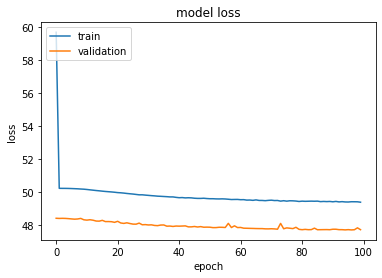

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

<span style="color:grey; font-size:1.2em">C'est temps d' <b>évaluer</b> notre modèle à la fois sur les données d'entraînement et de test et d'obtenir <b>scores</b> de précision.</span>

In [33]:
ypred = RBF_Keras.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, ypred))
mae = mean_absolute_error(y_valid, ypred)
print("la valeur du mean_squared_error est: ",rmse)
print("la valeur mean_absolute_error est: ",mae)

la valeur du mean_squared_error est:  103.85625639805843
la valeur mean_absolute_error est:  47.714579733710124


<center id="Conclusion">
        <h1 style="color:#1a1a1a;
                    font-size:2em">
        Conclusion 📌
        </h1>
</center>

<div style="color:grey; font-size:1.2em">Le travail que nous avons réalisé a consisté à exploirer le cycle de vie d'un project de Data Science en general et du Machine Learning et Deep Learning en particulier. On bien appris comment analyser et transformer les données, dans la partie du Pré-traitement on a diviser les données et vectoriser les phrases, et dernièrement la construction des modèles en essayant différentes approches: SVF et RBF NET.
<br>
<br>
<span style="color:black; font-size:1.2em; background-color:#FFFFA6">Ce projet nous a permis d'acquérir les techniques d'utiliser des réseaux RBF pour l’analyse et prédire.</span>
</div>